In [ ]:
import Pkg;
Pkg.add("PyPlot")
Pkg.add("Plots");
Pkg.add("JuMP");
Pkg.add("GLPK");
Pkg.add("LinearAlgebra");
Pkg.add("DataFrames");
Pkg.add("Random");
Pkg.add("Distances");

   Updating registry at `C:\Users\louis\.julia\registries\General`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environme

In [ ]:
import Pkg; Pkg.add("CSV"); Pkg.add("DataFrames")

  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
No Changes to `C:\Users\louis\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\louis\.julia\environments\v1.5\Manifest.toml`


In [ ]:
using CSV, DataFrames
hospitals = DataFrame(CSV.File("geocoded_hospitals.csv"))
hospitals[:, 27:28] # latitude and longitude

,latitude,longitude
,Float64,Float64
1,41.9539,-87.6549
2,41.8962,-87.6218
3,41.7786,-87.6331
4,41.7694,-87.6922
5,41.9364,-87.6533
6,41.9345,-87.6374
7,41.6928,-87.6249
8,41.7264,-87.567
9,41.7496,-87.5687


In [ ]:
using DataFrames

existing_hosp = Array{Float64,2}(undef, (42, 2))

existing_hosp[:,1] = hospitals[:,28] #Longitude
existing_hosp[:,2] = hospitals[:,27] #Latitude

num_existing_hosp = size(existing_hosp)[1] #number of rows of existing_hosp dataframe
println("Number of Existing Hospitals: ", num_existing_hosp)

existing_hosp

Number of Existing Hospitals: 42


42×2 Array{Float64,2}:
 -87.6549  41.9539
 -87.6218  41.8962
 -87.6331  41.7786
 -87.6922  41.7694
 -87.6533  41.9364
 -87.6374  41.9345
 -87.6249  41.6928
 -87.567   41.7264
 -87.5687  41.7496
 -87.5716  41.7775
 -87.5879  41.766
 -87.7435  41.9614
 -87.6046  41.7883
   ⋮       
 -87.6357  41.896
 -87.6536  41.9475
 -87.7287  41.9404
 -87.7994  41.9555
 -87.7933  41.9197
 -87.8146  41.9884
 -87.6356  41.8943
 -87.6183  41.8954
 -87.6774  41.9634
 -87.6982  41.975
 -87.6951  41.8622
 -87.6961  41.8757

In [ ]:
#Locations of POTENTIAL NEW HOSPITALS:

potential_hosp = Array{Float64,2}(undef, (100, 2)) #? why 100

x_grid = -88.270 .+ (-87.528 + 88.270).*collect(0.05:0.1:0.95)
y_grid = 41.473 .+ (42.154-41.473).*collect(0.05:0.1:0.95)

for i in 1:10
    for j in 1:10
        potential_hosp[10*(i-1)+j,:]=[x_grid[i],y_grid[j]]
    end
end

potential_hosp

100×2 Array{Float64,2}:
 -88.2329  41.507
 -88.2329  41.5752
 -88.2329  41.6433
 -88.2329  41.7114
 -88.2329  41.7795
 -88.2329  41.8475
 -88.2329  41.9156
 -88.2329  41.9838
 -88.2329  42.0519
 -88.2329  42.12
 -88.1587  41.507
 -88.1587  41.5752
 -88.1587  41.6433
   ⋮       
 -87.6393  42.0519
 -87.6393  42.12
 -87.5651  41.507
 -87.5651  41.5752
 -87.5651  41.6433
 -87.5651  41.7114
 -87.5651  41.7795
 -87.5651  41.8475
 -87.5651  41.9156
 -87.5651  41.9838
 -87.5651  42.0519
 -87.5651  42.12

In [ ]:
#Combine the above arrays so that we have one table for ALL hospital locations (both current hospitals and future hospitals)

all_hosp = Array{Float64,2}(undef, (size(existing_hosp)[1] .+ size(potential_hosp)[1], 2))
all_hosp[1:size(existing_hosp)[1],:] .= existing_hosp
all_hosp[(size(existing_hosp)[1]+1):size(all_hosp)[1],:] .= potential_hosp

println(size(all_hosp))
all_hosp[1:10,:]

(142, 2)


10×2 Array{Float64,2}:
 -87.6549  41.9539
 -87.6218  41.8962
 -87.6331  41.7786
 -87.6922  41.7694
 -87.6533  41.9364
 -87.6374  41.9345
 -87.6249  41.6928
 -87.567   41.7264
 -87.5687  41.7496
 -87.5716  41.7775

In [ ]:
using CSV, DataFrames
census = DataFrame(CSV.File("chicago_census_geocoded_new.csv"))
census[1:10, 6:7]

,LATITUDE,LONGITUDE
,Float64,Float64
1,42.0137,-87.7039
2,42.0145,-87.6937
3,42.0175,-87.7043
4,42.0171,-87.6954
5,42.0093,-87.7081
6,42.0035,-87.7071
7,42.0083,-87.702
8,42.0106,-87.697
9,42.0079,-87.6976


In [ ]:
# Patient Location/Population: 
# Each row represents a location
# Columns represent: (longitude, latitude, population at that location)

patients=Array{Float64,2}(undef, (2176,3)) # 3991 is number of rows of chicago_census_geocoded.csv

patients[:,1] = census[:,7] #Longitude
patients[:,2] = census[:,6] #Latitude
patients[:,3] = census[:,3] #total_population_B01003

patients

2176×3 Array{Float64,2}:
 -87.7039  42.0137  1359.0
 -87.6937  42.0145  1459.0
 -87.7043  42.0175  1841.0
 -87.6954  42.0171  1975.0
 -87.7081  42.0093  1590.0
 -87.7071  42.0035  1422.0
 -87.702   42.0083  2130.0
 -87.697   42.0106   787.0
 -87.6976  42.0079  1013.0
 -87.6929  42.009   3086.0
 -87.6868  42.0113   831.0
 -87.6857  42.0083  1722.0
 -87.685   42.0064  1965.0
   ⋮                
 -87.7057  41.7808  1620.0
 -87.7104  41.781   1116.0
 -87.7106  41.7843  1841.0
 -87.7054  41.7771  1663.0
 -87.7056  41.7734  1182.0
 -87.7104  41.7732  1006.0
 -87.7105  41.777   1495.0
 -87.6857  41.7774  1140.0
 -87.689   41.7773   666.0
 -87.6929  41.7773  1480.0
 -87.6963  41.7771  1533.0
 -87.7008  41.7771  1227.0

In [1]:
#Visualize Patients, Existing Hospitals, and Potential Locations for New Hospitals:

using PyPlot;

fig = figure();
ax = fig.add_subplot(1,1,1);
ax.set_xlabel(L"x-coordinate");
ax.set_ylabel(L"y-coordinate");
ax.grid(true);
ax.set_xlim(-87.9, -87.5);
ax.set_ylim(41.6, 42.1);

#Plot location of existing hospitals:
ax.scatter(existing_hosp[:,1], existing_hosp[:,2], color="black", s=10)

#Plot patient locations. 
ax.scatter(patients[:,1], patients[:,2], color="red", s= 1.0 .+ 0.005 .* patients[:,3], alpha =0.2)

# Plot the POTENTIAL locations for new hospitals:
ax.scatter(potential_hosp[:,1], potential_hosp[:,2], color="black", s=0.5, alpha = 0.5)

SyntaxError: ignored

In [ ]:
#HOSPITALS x PATIENTS

#Calculate pairwise distances between ALL hospital locations (existing and potential future locations) 
#and ALL patient locations

#each ROW represents a HOSPITAL (current or potential)
#each COLUMN represents a group of PATIENTS

using Distances;

# Initialize distance function:
haversine_distance_miles = Haversine(3958.8) #use this radius to represent average radius of Earth, in MILES.

dist_matrix = Array{Float64,2}(undef, (size(all_hosp)[1], size(patients)[1]))
print(size(dist_matrix))

for i in 1:size(dist_matrix)[1]
    for j in 1:size(dist_matrix)[2]
        dist_matrix[i,j]= evaluate(haversine_distance_miles, all_hosp[i,1:2], patients[j,1:2])
    end
end

dist_matrix

(142, 2176)

142×2176 Array{Float64,2}:
  4.83758   4.63956   5.07436   4.83962  …  12.3598    12.398     12.4372
  9.14522   8.96885   9.38876   9.16882      8.99896    9.08036    9.17721
 16.6471   16.5986   16.9088   16.7915       3.08518    3.26176    3.49001
 16.8914   16.9409   17.1557   17.1209       0.546199   0.576303   0.695304
  5.93794   5.78248   6.18431   5.98175     11.1859    11.2283    11.2736
  6.44822   6.23794   6.68328   6.43797  …  11.2375    11.2924    11.3538
 22.5432   22.5133   22.8062   22.7045       6.80899    6.89371    7.02013
 21.0608   20.9471   21.3159   21.1451       7.38036    7.53175    7.73572
 19.5251   19.4      19.7786   19.5986       6.67763    6.84432    7.06465
 17.6827   17.5423   17.9338   17.7416       6.2489     6.42531    6.65371
 18.1211   18.0114   18.3767   18.2092   …   5.4671     5.64052    5.8672
  4.14486   4.47692   4.36759   4.57659     12.9884    12.9632    12.9204
 16.3863   16.2871   16.6431   16.4842       4.61465    4.79013    5.01533
  

In [ ]:
#Create a weighted distance matrix; weight the distances by the population at each location

weighted_dist_matrix = Array{Float64,2}(undef, size(dist_matrix))
print(size(weighted_dist_matrix))

for i in 1:size(weighted_dist_matrix)[1]
    for j in 1:size(weighted_dist_matrix)[2]
        weighted_dist_matrix[i,j] = dist_matrix[i,j]*patients[j,3]
    end
end

weighted_dist_matrix

(142, 2176)

142×2176 Array{Float64,2}:
  6574.28   6769.12   9341.9    9558.25  …  18292.6    19006.1    15260.4
 12428.4   13085.6   17284.7   18108.4      13318.5    13920.2    11260.4
 22623.4   24217.3   31129.1   33163.2       4566.07    5000.28    4282.24
 22955.4   24716.8   31583.6   33813.8        808.375    883.472    853.138
  8069.66   8436.64  11385.3   11814.0      16555.1    17213.0    13832.7
  8763.14   9101.16  12303.9   12715.0   …  16631.4    17311.2    13931.1
 30636.2   32846.9   41986.2   44841.4      10077.3    10568.1     8613.7
 28621.6   30561.8   39242.6   41761.7      10922.9    11546.2     9491.73
 26534.6   28304.6   36412.4   38707.2       9882.9    10492.3     8668.32
 24030.7   25594.3   33016.0   35039.6       9248.37    9849.99    8164.1
 24626.6   26278.6   33831.5   35963.1   …   8091.31    8646.92    7199.06
  5632.86   6531.82   8040.74   9038.77     19222.8    19872.7    15853.3
 22269.0   23762.9   30639.9   32556.3       6829.68    7343.27    6153.81
    

## Baseline Model: Existing Hospitals Only:

In [ ]:
using JuMP, GLPK

myModel = Model(with_optimizer(GLPK.Optimizer))

num_new_hosp = 0

#Assignment Matrix: this assigns each patient to a hospital.
@variable(myModel, 0 <= assignment_matrix[1:size(dist_matrix)[1], 1:size(dist_matrix)[2]] <= 1, Bin) 
#Vector of which hospitals are open vs. closed:
@variable(myModel, 0 <= hosp_open[1:size(dist_matrix)[1]] <= 1, Bin)

#all existing hospitals must stay open:
for i in 1:size(existing_hosp)[1]
    @constraint(myModel, hosp_open[i]==1)
end

#The total number of hospitals that can be open must be equal to the existing hospitals, PLUS the number
#of new hospitals selected above:
@constraint(myModel, sum(hosp_open) == num_existing_hosp + num_new_hosp)

#each group of patients can be assigned to 1 and only 1 hospital
for i in 1:size(assignment_matrix)[2]
    @constraint(myModel, sum(assignment_matrix[:,i])==1)
end

#A patient can only be assigned to a hospital if that hospital is open.
#Thus, for each row of the assignment matrix, the assignments can ==1 ONLY if the corresponding hosp_open value ==1
for i in 1:size(assignment_matrix)[1]
    for j in 1:size(assignment_matrix)[2]
        @constraint(myModel, assignment_matrix[i,j]<=hosp_open[i])
    end
end

#Objective: Minimize the sum of the Weighted_Distance*Assignment
#('Assignment' means the 0/1 variable. In other words, the weighted distance only "counts" toward the sum if that patient is assigned to that hospital.)
@objective(myModel, Min, sum(assignment_matrix .* weighted_dist_matrix))
status=optimize!(myModel)

#Store Results:
hosp_open_result = JuMP.value.(hosp_open)
assignment_matrix_result = JuMP.value.(assignment_matrix)
println("Objective value: ", JuMP.objective_value(myModel))


#Weighted Average is the weighted sum divided by the total population:
weighted_avg_distance_result = JuMP.objective_value(myModel)/sum(patients[:,3])
println("New Weighted Average Distance to Hospital: ", weighted_avg_distance_result)

Objective value: 3.527933640457345e6
New Weighted Average Distance to Hospital: 1.2988982501204285


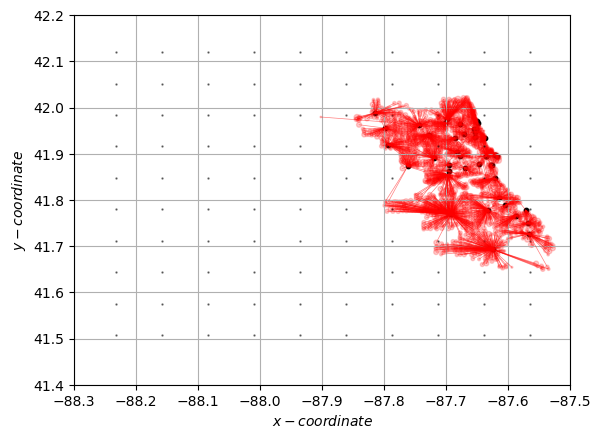

Baseline Weighted Average Distance to Hospital: 1.2988982501204285


In [ ]:
# Graph Results: 

println("Baseline Weighted Average Distance to Hospital: ", weighted_avg_distance_result)

using PyPlot;

fig = figure();
ax = fig.add_subplot(1,1,1);
ax.set_xlabel(L"x-coordinate");
ax.set_ylabel(L"y-coordinate");
ax.grid(true);
ax.set_xlim(-88.3, -87.5);
ax.set_ylim(41.4, 42.2);

ax.scatter(existing_hosp[:,1], existing_hosp[:,2], color="black", s=10)

ax.scatter(patients[:,1], patients[:,2], color="red", s= 1.0 .+ 0.005 .* patients[:,3], alpha =0.2)

ax.scatter(potential_hosp[:,1], potential_hosp[:,2], color="black", s=0.5, alpha = 0.5)

#Draw a blue point for the new hospitals, if any:
for i in (num_existing_hosp+1):length(hosp_open)
    if hosp_open[i]==1
        ax.scatter(all_hosp[i,1], all_hosp[i,2], color = "blue", s=30)
        else 
    end
end

#Draw lines showing which patients are assigned to which hospitals:
for i in 1:size(assignment_matrix_result)[1]
    for j in 1:size(assignment_matrix_result)[2]
        if assignment_matrix_result[i,j]==1
            ax.plot([all_hosp[i,1], patients[j,1]], [all_hosp[i,2], patients[j,2]], linewidth=0.5, alpha=0.5,
                color= (if i <= num_existing_hosp
                        "red"
                    else
                        "blue"
                        end))
            else 
                end
    end
end


## 1 New Hospital:

In [ ]:
using JuMP, GLPK

myModel = Model(with_optimizer(GLPK.Optimizer))

num_new_hosp = 1

@variable(myModel, 0 <= assignment_matrix[1:size(dist_matrix)[1], 1:size(dist_matrix)[2]] <= 1, Bin) #type binary

@variable(myModel, 0 <= hosp_open[1:size(dist_matrix)[1]] <= 1, Bin) #type binary

for i in 1:size(existing_hosp)[1]
    @constraint(myModel, hosp_open[i]==1)
end

@constraint(myModel, sum(hosp_open) == num_existing_hosp + num_new_hosp)

for i in 1:size(assignment_matrix)[2]
    @constraint(myModel, sum(assignment_matrix[:,i])==1)
end


for i in 1:size(assignment_matrix)[1]
    for j in 1:size(assignment_matrix)[2]
        @constraint(myModel, assignment_matrix[i,j]<=hosp_open[i])
    end
end

@objective(myModel, Min, sum(assignment_matrix .* weighted_dist_matrix))
status=optimize!(myModel)

#Store Results:
hosp_open_result = JuMP.value.(hosp_open)
assignment_matrix_result = JuMP.value.(assignment_matrix)
println("Objective value: ", JuMP.objective_value(myModel))

#Weighted Average is the weighted sum divided by the total population:
weighted_avg_distance_result = JuMP.objective_value(myModel)/sum(patients[:,3])
println("New Weighted Average Distance to Hospital: ", weighted_avg_distance_result)

Objective value: 3.3477855502264528e6
New Weighted Average Distance to Hospital: 1.232572161534162


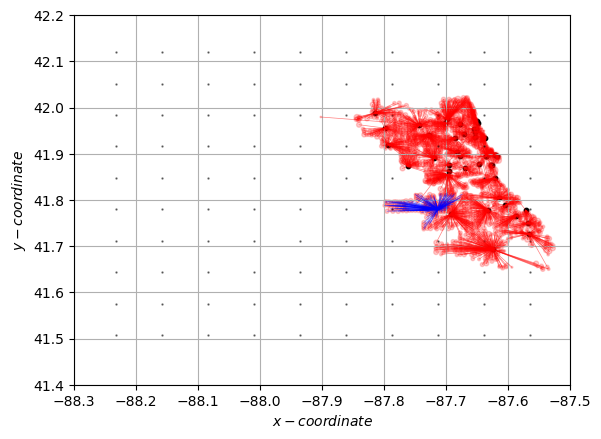

New Weighted Average Distance to Hospital: 1.232572161534162


In [ ]:
# Graph Results: 

println("New Weighted Average Distance to Hospital: ", weighted_avg_distance_result)

using PyPlot;

fig = figure();
ax = fig.add_subplot(1,1,1);
ax.set_xlabel(L"x-coordinate");
ax.set_ylabel(L"y-coordinate");
ax.grid(true);
ax.set_xlim(-88.3, -87.5);
ax.set_ylim(41.4, 42.2);

#Plot location of existing hospitals:
ax.scatter(existing_hosp[:,1], existing_hosp[:,2], color="black", s=10)

#Plot patient locations:
ax.scatter(patients[:,1], patients[:,2], color="red", s= 1.0 .+ 0.005 .* patients[:,3], alpha =0.2)

#Plot the POTENTIAL locations for new hospitals:
ax.scatter(potential_hosp[:,1], potential_hosp[:,2], color="black", s=0.5, alpha = 0.5)

#Draw a blue point for the new hospitals, if any:
for i in (num_existing_hosp+1):length(hosp_open)
    if hosp_open[i]==1
        ax.scatter(all_hosp[i,1], all_hosp[i,2], color = "blue", s=30)
        else 
    end
end

#Draw lines showing which patients are assigned to which hospitals:
for i in 1:size(assignment_matrix_result)[1]
    for j in 1:size(assignment_matrix_result)[2]
        if assignment_matrix_result[i,j]==1
            ax.plot([all_hosp[i,1], patients[j,1]], [all_hosp[i,2], patients[j,2]], linewidth=0.5, alpha=0.5,
                color= (if i <= num_existing_hosp
                        "red"
                    else
                        "blue"
                        end))
            else 
                end
    end
end

## 2 New Hospitals:

In [ ]:
using JuMP, GLPK

myModel = Model(with_optimizer(GLPK.Optimizer))

num_new_hosp = 2

@variable(myModel, 0 <= assignment_matrix[1:size(dist_matrix)[1], 1:size(dist_matrix)[2]] <= 1, Bin)
@variable(myModel, 0 <= hosp_open[1:size(dist_matrix)[1]] <= 1, Bin)



for i in 1:size(existing_hosp)[1]
    @constraint(myModel, hosp_open[i]==1)
end

@constraint(myModel, sum(hosp_open) == num_existing_hosp + num_new_hosp)

for i in 1:size(assignment_matrix)[2]
    @constraint(myModel, sum(assignment_matrix[:,i])==1)
end

for i in 1:size(assignment_matrix)[1]
    for j in 1:size(assignment_matrix)[2]
        @constraint(myModel, assignment_matrix[i,j]<=hosp_open[i])
    end
end



@objective(myModel, Min, sum(assignment_matrix .* weighted_dist_matrix))
status=optimize!(myModel)


hosp_open_result = JuMP.value.(hosp_open)
assignment_matrix_result = JuMP.value.(assignment_matrix)
println("Objective value: ", JuMP.objective_value(myModel))


weighted_avg_distance_result = JuMP.objective_value(myModel)/sum(patients[:,3])
println("New Weighted Average Distance to Hospital: ", weighted_avg_distance_result)

Objective value: 3.239783022151035e6
New Weighted Average Distance to Hospital: 1.1928082915120612


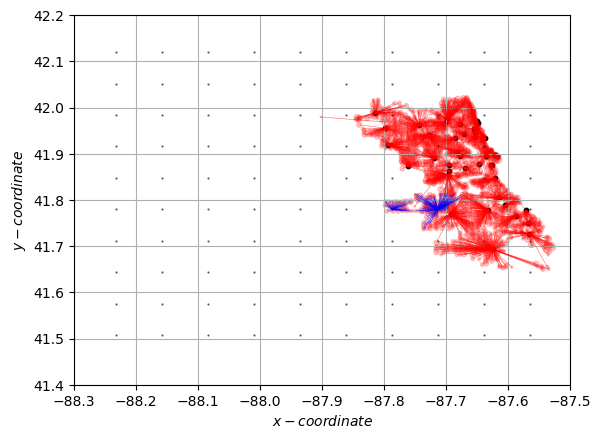

In [ ]:
using PyPlot;

fig = figure();
ax = fig.add_subplot(1,1,1);
ax.set_xlabel(L"x-coordinate");
ax.set_ylabel(L"y-coordinate");
ax.grid(true);
ax.set_xlim(-88.3, -87.5);
ax.set_ylim(41.4, 42.2);

ax.scatter(existing_hosp[:,1], existing_hosp[:,2], color="black", s=10)
ax.scatter(patients[:,1], patients[:,2], color="red", s= 1.0 .+ 0.005 .* patients[:,3], alpha =0.2)
ax.scatter(potential_hosp[:,1], potential_hosp[:,2], color="black", s=0.5, alpha = 0.5)


for i in (num_existing_hosp+1):length(hosp_open)
    if hosp_open[i]==1
        ax.scatter(all_hosp[i,1], all_hosp[i,2], color = "blue", s=30)
        else 
    end
end


for i in 1:size(assignment_matrix_result)[1]
    for j in 1:size(assignment_matrix_result)[2]
        if assignment_matrix_result[i,j]==1
            ax.plot([all_hosp[i,1], patients[j,1]], [all_hosp[i,2], patients[j,2]], linewidth=0.5, alpha=0.5,
                color= (if i <= num_existing_hosp
                        "red"
                    else
                        "blue"
                        end))
            else 
                end
    end
end

## 3 New Hospitals:

In [ ]:
using JuMP, GLPK

myModel = Model(with_optimizer(GLPK.Optimizer))

num_new_hosp = 3

@variable(myModel, 0 <= assignment_matrix[1:size(dist_matrix)[1], 1:size(dist_matrix)[2]] <= 1, Bin)
@variable(myModel, 0 <= hosp_open[1:size(dist_matrix)[1]] <= 1, Bin)



for i in 1:size(existing_hosp)[1]
    @constraint(myModel, hosp_open[i]==1)
end

@constraint(myModel, sum(hosp_open) == num_existing_hosp + num_new_hosp)

for i in 1:size(assignment_matrix)[2]
    @constraint(myModel, sum(assignment_matrix[:,i])==1)
end

for i in 1:size(assignment_matrix)[1]
    for j in 1:size(assignment_matrix)[2]
        @constraint(myModel, assignment_matrix[i,j]<=hosp_open[i])
    end
end



@objective(myModel, Min, sum(assignment_matrix .* weighted_dist_matrix))
status=optimize!(myModel)


hosp_open_result = JuMP.value.(hosp_open)
assignment_matrix_result = JuMP.value.(assignment_matrix)
println("Objective value: ", JuMP.objective_value(myModel))


weighted_avg_distance_result = JuMP.objective_value(myModel)/sum(patients[:,3])
println("New Weighted Average Distance to Hospital: ", weighted_avg_distance_result)

Objective value: 3.141271825594854e6
New Weighted Average Distance to Hospital: 1.156538895921189


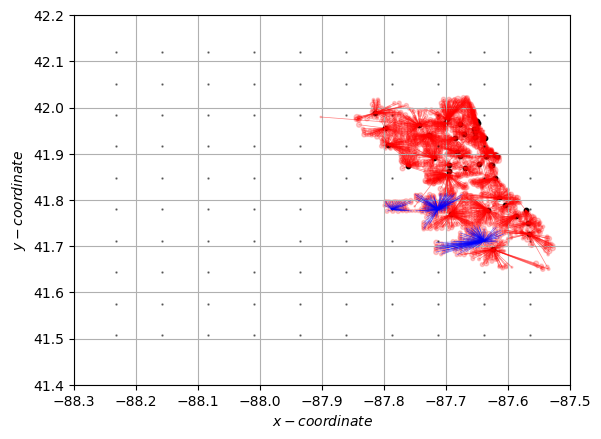

In [ ]:
using PyPlot;

fig = figure();
ax = fig.add_subplot(1,1,1);
ax.set_xlabel(L"x-coordinate");
ax.set_ylabel(L"y-coordinate");
ax.grid(true);
ax.set_xlim(-88.3, -87.5);
ax.set_ylim(41.4, 42.2);

ax.scatter(existing_hosp[:,1], existing_hosp[:,2], color="black", s=10)
ax.scatter(patients[:,1], patients[:,2], color="red", s= 1.0 .+ 0.005 .* patients[:,3], alpha =0.2)
ax.scatter(potential_hosp[:,1], potential_hosp[:,2], color="black", s=0.5, alpha = 0.5)


for i in (num_existing_hosp+1):length(hosp_open)
    if hosp_open[i]==1
        ax.scatter(all_hosp[i,1], all_hosp[i,2], color = "blue", s=30)
        else 
    end
end


for i in 1:size(assignment_matrix_result)[1]
    for j in 1:size(assignment_matrix_result)[2]
        if assignment_matrix_result[i,j]==1
            ax.plot([all_hosp[i,1], patients[j,1]], [all_hosp[i,2], patients[j,2]], linewidth=0.5, alpha=0.5,
                color= (if i <= num_existing_hosp
                        "red"
                    else
                        "blue"
                        end))
            else 
                end
    end
end